# Q-Learning SARSA

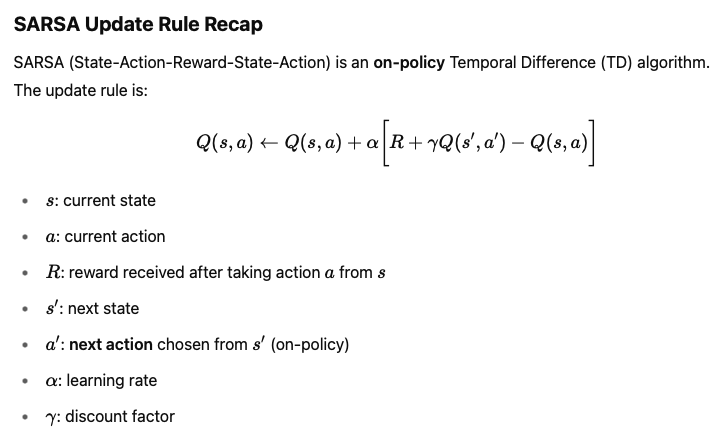

In [1]:
import numpy as np
import random
import time
import pandas as pd

In [2]:
import gymnasium as gym
from IPython.display import clear_output

# Create FrozenLake
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi", map_name="4x4")

In [3]:
# Hyperparameters:

N_STATES = 16   # the length of the 4 dimensional world
ACTIONS = ['left', 'down', 'right', 'up']     # available actions
# 0: Move left
# 1: Move down
# 2: Move right
# 3: Move up

EPSILON = 0.9   # greedy policy
ALPHA = 0.1     # learning rate
GAMMA = 0.9    # discount factor
THETA = 1e-8            # Convergence threshold


FRESH_TIME = 0.3    # refresh/pause time for one move used in time.sleep

MAX_EPISODES = 50   # maximum episodes

num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
epsilon = 0.2


In [4]:
# Create an initial Q table 
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

# q_table = pd.DataFrame(
#     np.zeros((state_space_size, action_space_size)),     # q_table initial values
#     columns=ACTIONS,    # actions's name
# )
    
print(q_table)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# This is our Policy (AKA Model) (AKA Q Table)
def choose_action(env, state, q_table):

    # Exploration-exploitation trade-off
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > epsilon:
        action = np.argmax(q_table[state,:])
    else:
        action = env.action_space.sample()


    return action

In [6]:
def q_learning_SARSA(env, q_table):
    for episode in range(num_episodes):
        # Fix reset() usage
        S, info = env.reset()
       
        for step in range(max_steps_per_episode):
  
            A = choose_action(env, S, q_table)
            
            S_, R, terminated, truncated, info = env.step(A)
            
            # q_predict = q_table.loc[S, A]
            q_predict = q_table[S, A]
            
            if S_ != terminated and S_ != truncated:
                A_ = choose_action(env, S_, q_table)
                q_target = R + GAMMA * q_table[S_, A_] - q_predict

            else:
                q_target = R     # next state is terminal
                # is_terminated = True    # terminate this episode

            q_table[S, A] += ALPHA * q_target  # update
            
            S = S_  # move to next state

            
            # #Print info
            # print(f"Episode Step {step} Given Action {action} I got reward {reward} and next state {new_state}")
            

            # the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
            if R and S_==15:
                print("You Won!!!")
                print(f"Episode {episode + 1} ended with reward: {R}")
                env.close()
                break
            
            #Check for Termination
            if terminated or truncated:
                print("GAME OVER --- Terminated!!!")
                print(f"Episode {episode + 1} ended with reward: {R}")
                env.close()
                break

    
    return q_table

In [7]:
q_table = q_learning_SARSA(env, q_table)

GAME OVER --- Terminated!!!
Episode 1 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 2 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 3 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 4 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 5 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 6 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 7 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 8 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 9 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 10 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 11 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 12 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 13 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 14 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 15 ended with reward: 0.0
GAME OVER --- Terminated!!!
Episode 16 ended with reward: 0.0
GAME OVER --- Ter

In [8]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)




********Q-table********

[[0.         0.37924197 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.11413747 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.38470157 0.46656573 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74744246 0.         0.00536596]
 [0.         0.         0.         0.        ]
 [0.53222113 0.         0.597117   0.3920599 ]
 [0.52854563 0.52665387 0.64331864 0.        ]
 [0.636213   0.87493927 0.         0.59451776]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.74802199 0.8809096  0.59537659]
 [0.75745795 0.86964706 1.         0.71539785]
 [0.         0.         0.         0.        ]]


In [9]:
def testModel(env, q_table):
    #Deploy Code
    actionLog = []
    for episode in range(1):
        state, info = env.reset()  # Fix: Unpack both state and info
        done = False
        print("*****EPISODE ", episode+1, "*****\n\n\n\n")
        time.sleep(1)

        for step in range(max_steps_per_episode):
            clear_output(wait=True)
            env.render()
            time.sleep(0.3)

            action = np.argmax(q_table[state,:])
            actionLog.append(action)
            # Fix: Handle all five return values from step()
            new_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated  # Combine both terminal conditions

            if done:
                clear_output(wait=True)
                env.render()
                if reward == 1:
                    print("****You reached the goal!****")
                    time.sleep(3)
                else:
                    print("****You fell through a hole!****")
                    time.sleep(3)
                clear_output(wait=True)
                break

            state = new_state

    env.close()
    
    return actionLog


In [12]:
# Create FrozenLake
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="4x4")

actionLog = testModel(env, q_table)


****You reached the goal!****


In [11]:
len(actionLog)

6